# 1. Introduction

Diabetes is a chronic disease that occurs when the pancreas is no longer able to produce insulin or when the body cannot make full use of the insulin it produces. In this case, our body’s blood sugar will rise, which will lead to a chronic damage dysfunction of various tissues, especially the eyes, kidneys, heart, blood vessels, and nerves.

In this project, we will utilize machine learning algorithms to predict early-stage diabetes risk.

## 1.1 Imports

To keep our project clean, we have consolidated all our imports in the cell below.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
diabetes = pd.read_csv("diabetes_data_upload.csv")

# Full Model

In [14]:
df2 = diabetes.copy()

# changes the target variable to have values 0, 1
le = preprocessing.LabelEncoder()

df2['Gender'] = le.fit_transform(df2['Gender'])
df2['Polyuria'] = le.fit_transform(df2['Polyuria'])
df2['Polydipsia'] = le.fit_transform(df2['Polydipsia'])
df2['sudden weight loss'] = le.fit_transform(df2['sudden weight loss'])
df2['weakness'] = le.fit_transform(df2['weakness'])
df2['Polyphagia'] = le.fit_transform(df2['Polyphagia'])
df2['Genital thrush'] = le.fit_transform(df2['Genital thrush'])
df2['visual blurring'] = le.fit_transform(df2['visual blurring'])
df2['Itching'] = le.fit_transform(df2['Itching'])
df2['Irritability'] = le.fit_transform(df2['Irritability'])
df2['delayed healing'] = le.fit_transform(df2['delayed healing'])
df2['partial paresis'] = le.fit_transform(df2['partial paresis'])
df2['muscle stiffness'] = le.fit_transform(df2['muscle stiffness'])
df2['Alopecia'] = le.fit_transform(df2['Alopecia'])
df2['Obesity'] = le.fit_transform(df2['Obesity'])
df2['class'] = le.fit_transform(df2['class'])

In [15]:
X1 = df2.drop('class',axis=1)

Y1 = df2['class']

from sklearn.model_selection import train_test_split
np.random.seed(999)
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,test_size=0.2,random_state=100)

In [16]:
from sklearn.metrics import accuracy_score,classification_report

#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier() 


# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

#KNN
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for i in range(1,40):    
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train1,Y_train1)
    predK = kn.predict(X_test1)
    accuracy.append([accuracy_score(Y_test1,predK),i])
    #print('Tested for k =',i)
temp = accuracy[0]
for m in accuracy:
    if temp[0] < m[0]:
        temp=m
knn = KNeighborsClassifier(n_neighbors=temp[1])

#SVM
from sklearn.svm import SVC
svc = SVC()

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000, 2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

print('Models Imported')

Models Imported


In [17]:
model_acc = []
models = [xgb,lr,rfc,knn,svc,grid]
#model_name = ['xgb','lr','rfc','kno','svc','grid']
for i in models:
    i.fit(X_train1,Y_train1)
    model_acc.append(accuracy_score(Y_test1,i.predict(X_test1)))
                      
models = pd.DataFrame({'Models':models,'Accuracy':model_acc})

[11:48:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.614 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.602 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.602 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.614 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, k

In [18]:
models = models.sort_values(by=['Accuracy'],ascending=False).reset_index().drop('index',axis=1)
best = models['Models'][0]
models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
models

,Models,Accuracy
0,RandomForestClassifier,0.961538
1,GridSearchCV,0.961538
2,LogisticRegression,0.951923
3,XGBClassifier,0.942308
4,KNeighborsClassifier,0.913462
5,SVC,0.673077


In [19]:
print('Hence the best model is',models['Models'][0],'with an accuracy of',round((models['Accuracy'][0]*100),2),'%')
print('\nThe classification report is:')
print(classification_report(Y_test1,best.predict(X_test1)))

Hence the best model is RandomForestClassifier with an accuracy of 96.15 %

The classification report is:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        34
           1       0.99      0.96      0.97        70

    accuracy                           0.96       104
   macro avg       0.95      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



# Correlation Model

<AxesSubplot:>

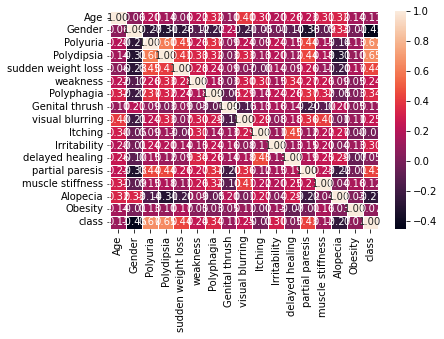

In [20]:
df1 = diabetes.copy()

# changes the target variable to have values 0, 1, and 2
le = preprocessing.LabelEncoder()

df1['Gender'] = le.fit_transform(df1['Gender'])
df1['Polyuria'] = le.fit_transform(df1['Polyuria'])
df1['Polydipsia'] = le.fit_transform(df1['Polydipsia'])
df1['sudden weight loss'] = le.fit_transform(df1['sudden weight loss'])
df1['weakness'] = le.fit_transform(df1['weakness'])
df1['Polyphagia'] = le.fit_transform(df1['Polyphagia'])
df1['Genital thrush'] = le.fit_transform(df1['Genital thrush'])
df1['visual blurring'] = le.fit_transform(df1['visual blurring'])
df1['Itching'] = le.fit_transform(df1['Itching'])
df1['Irritability'] = le.fit_transform(df1['Irritability'])
df1['delayed healing'] = le.fit_transform(df1['delayed healing'])
df1['partial paresis'] = le.fit_transform(df1['partial paresis'])
df1['muscle stiffness'] = le.fit_transform(df1['muscle stiffness'])
df1['Alopecia'] = le.fit_transform(df1['Alopecia'])
df1['Obesity'] = le.fit_transform(df1['Obesity'])
df1['class'] = le.fit_transform(df1['class'])

# get correlation and draw heatmap
cor = df1.corr()
sns.heatmap(cor, linewidths = 1, annot = True, fmt = ".2f")

In [21]:
target = abs(cor['class'])
# find which variables have very low correlation with 'class'
target[target < 0.24]

Age                 0.108679
Genital thrush      0.110288
Itching             0.013384
delayed healing     0.046980
muscle stiffness    0.122474
Obesity             0.072173
Name: class, dtype: float64

In [22]:
# find which variables have very high correlation with 'class'
target[target > 0.24]

Gender                0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
visual blurring       0.251300
Irritability          0.299467
partial paresis       0.432288
Alopecia              0.267512
class                 1.000000
Name: class, dtype: float64

只考虑症状, 不考虑“age”和“Gender” 

所以把“Gender”删掉 从而用“muscle stiffness”来代替“Gender”. “muscle stiffness”的correlation是0.122474

In [24]:
diabetes = diabetes[['muscle stiffness', 'weakness', 'visual blurring', 'Irritability', 'Alopecia', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'Polyphagia', 'partial paresis', 'class']]
le = preprocessing.LabelEncoder()
diabetes['muscle stiffness'] = le.fit_transform(diabetes['muscle stiffness'])
diabetes['Polyuria'] = le.fit_transform(diabetes['Polyuria'])
diabetes['Polydipsia'] = le.fit_transform(diabetes['Polydipsia'])
diabetes['sudden weight loss'] = le.fit_transform(diabetes['sudden weight loss'])
diabetes['Polyphagia'] = le.fit_transform(diabetes['Polyphagia'])
diabetes['partial paresis'] = le.fit_transform(diabetes['partial paresis'])
diabetes['weakness'] = le.fit_transform(diabetes['weakness'])
diabetes['visual blurring'] = le.fit_transform(diabetes['visual blurring'])
diabetes['Irritability'] = le.fit_transform(diabetes['Irritability'])
diabetes['Alopecia'] = le.fit_transform(diabetes['Alopecia'])
diabetes['class'] = le.fit_transform(diabetes['class'])

In [26]:
X = diabetes.drop('class',axis=1)

Y = diabetes['class']

from sklearn.model_selection import train_test_split
np.random.seed(999)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [27]:
from sklearn.metrics import accuracy_score,classification_report

#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier() 


# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

#KNN
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for i in range(1,40):    
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,Y_train)
    predK = kn.predict(X_test)
    accuracy.append([accuracy_score(Y_test,predK),i])
    #print('Tested for k =',i)
temp = accuracy[0]
for m in accuracy:
    if temp[0] < m[0]:
        temp=m
knn = KNeighborsClassifier(n_neighbors=temp[1])

#SVM
from sklearn.svm import SVC
svc = SVC()

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000, 2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

print('Models Imported')

Models Imported


In [28]:
model_acc = []
models = [xgb,lr,rfc,knn,svc,grid]
#model_name = ['xgb','lr','rfc','kno','svc','grid']
for i in models:
    i.fit(X_train,Y_train)
    model_acc.append(accuracy_score(Y_test,i.predict(X_test)))
                      
models = pd.DataFrame({'Models':models,'Accuracy':model_acc})

[11:48:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.855 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.795 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.855 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, k

In [29]:
models = models.sort_values(by=['Accuracy'],ascending=False).reset_index().drop('index',axis=1)
best = models['Models'][0]
models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
models

,Models,Accuracy
0,XGBClassifier,0.971154
1,RandomForestClassifier,0.961538
2,GridSearchCV,0.961538
3,KNeighborsClassifier,0.951923
4,SVC,0.942308
5,LogisticRegression,0.865385


In [30]:
print('Hence the best model is',models['Models'][0],'with an accuracy of',round((models['Accuracy'][0]*100),2),'%')
print('\nThe classification report is:')
print(classification_report(Y_test,best.predict(X_test)))

Hence the best model is XGBClassifier with an accuracy of 97.12 %

The classification report is:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.97      0.99      0.98        70

    accuracy                           0.97       104
   macro avg       0.97      0.96      0.97       104
weighted avg       0.97      0.97      0.97       104



In [31]:
xgb.fit(X_train,Y_train)
accuracy_score(Y_test,xgb.predict(X_test))

[11:54:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9711538461538461

In [45]:
import random

column_name = X_test.columns
result = [0, 1]
# Assume there are n = 10 users
n = 10

dict = {}

for i in column_name:
    dict.update( {str(i) : random.choices(result, k = 10)} )
questionnaire = pd.DataFrame(dict)
questionnaire

,muscle stiffness,weakness,visual blurring,Irritability,Alopecia,Polyuria,Polydipsia,sudden weight loss,Polyphagia,partial paresis
0,1,1,1,1,1,0,0,1,1,0
1,1,0,0,1,1,1,1,1,1,0
2,1,0,0,1,0,1,1,1,0,0
3,0,1,0,1,1,0,1,1,0,1
4,1,0,1,1,0,0,0,0,0,1
5,1,0,1,1,1,0,0,0,0,1
6,1,0,1,1,0,1,0,0,1,1
7,0,1,0,0,1,0,0,1,0,0
8,0,1,0,1,0,1,1,0,1,0
9,0,0,1,0,0,1,1,1,1,1


In [46]:
xgb.predict(questionnaire)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1])